In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/badrinathsanagavaram/Desktop/GitHUB practice folder/Python Pandas Projects/india-election-analysis-2024/data/elections-data-2024-cleaned.csv")

In [4]:
df.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status,state
0,adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared,Telangana
1,agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,Result Declared,Uttar Pradesh
2,ahmedabad east,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,Result Declared,Gujarat
3,ahmedabad west,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437,Result Declared,Gujarat
4,ahmednagar,37,NILESH DNYANDEV LANKE,Nationalist Congress Party – Sharadchandra Pawar,DR. SUJAY RADHAKRISHNA VIKHEPATIL,Bharatiya Janata Party,28929,Result Declared,Maharashtra
5,ajmer,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared,Rajasthan
6,akola,6,ANUP SANJAY DHOTRE,Bharatiya Janata Party,ABHAY KASHINATH PATIL,Indian National Congress,40626,Result Declared,Maharashtra
7,alappuzha,15,K. C VENUGOPAL,Indian National Congress,A. M ARIFF,Communist Party of India (Marxist),63513,Result Declared,Kerala
8,alathur,9,K.RADHAKRISHNAN,Communist Party of India (Marxist),RAMYA HARIDAS,Indian National Congress,20111,Result Declared,Kerala
9,alipurduars,2,MANOJ TIGGA,Bharatiya Janata Party,PRAKASH CHIK BARAIK,All India Trinamool Congress,75447,Result Declared,West Bengal


In [6]:
df_grp_state=df.groupby('state')

In [31]:
state_wise_results = df_grp_state[['Leading Party','state']].value_counts()

In [32]:
state_wise_results = pd.DataFrame(state_wise_results)

In [33]:
pd.set_option('Display.max_rows', 200)

In [42]:
state_wise_results.sort_values(by = ['state','count'],ascending=False)

count
state                                    Leading Party                                            
West Bengal                              All India Trinamool Congress                           20
                                         Bharatiya Janata Party                                  7
Uttarakhand                              Bharatiya Janata Party                                  4
Uttar Pradesh                            Samajwadi Party                                        33
                                         Bharatiya Janata Party                                 28
                                         Indian National Congress                                5
                                         Rashtriya Lok Dal                                       2
                                         Aazad Samaj Party (Kanshi Ram)                          1
Tripura                                  Bharatiya Janata Party                                  2
Telangana                                Indian National Congress                                8
                                         Bharatiya Janata Party                                  7
                                         All India Majlis-E-Ittehadul Muslimeen                  1
Tamil Nadu                               Dravida Munnetra Kazhagam                              19
                                         Indian National Congress                                8
                                         Indian Union Muslim League                              2
                                         Communist Party of India                                2
                                         Viduthalai Chiruthaigal Katch                           1
                                         Communist Party of India (Marxist)                      1
                                         Marumalarchi Dravida Munnetra Kazhagam                  1
Sikkim                                   Sikkim Krantikari Morcha                                1
Rajasthan                                Bharatiya Janata Party                                 12
                                         Indian National Congress                                6
                                         Rashtriya Loktantrik Party                              1
                                         Communist Party of India (Marxist)                      1
Punjab                                   Indian National Congress                                7
                                         Aam Aadmi Party                                         3
                                         Independent                                             2
                                         Shiromani Akali Dal                                     1
Puducherry                               Indian National Congress                                1
Odisha                                   Bharatiya Janata Party                                 15
                                         Indian National Congress                                1
Nagaland                                 Indian National Congress                                1
Mizoram                                  Zoram People’s Movement                                 1
Manipur                                  Indian National Congress                                2
Maharashtra                              Indian National Congress                               13
                                         Shiv Sena (Uddhav Balasaheb Thackrey)                   9
                                         Bharatiya Janata Party                                  8
                                         Nationalist Congress Party – Sharadchandra Pawar        6
                                         Shiv Sena                                               6
                                  

<Axes: xlabel='state,Leading Party'>

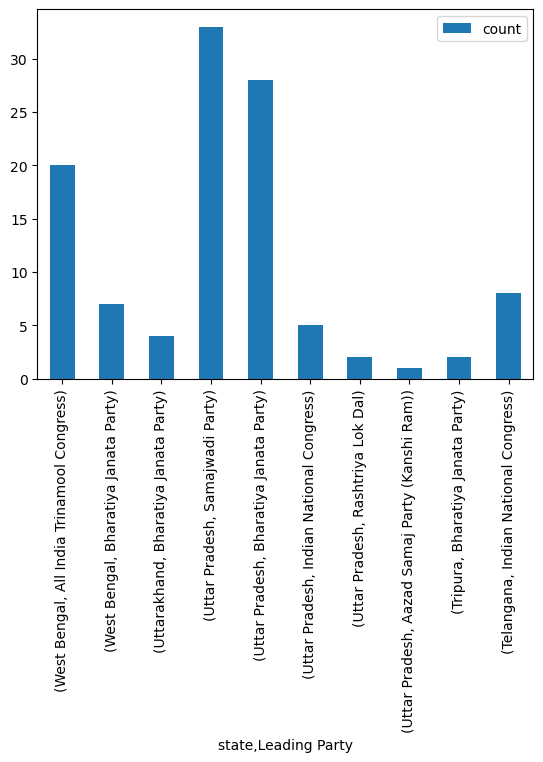

In [43]:
state_wise_results.sort_values(by = ['state','count'],ascending=False).head(10).plot(kind = 'bar', stacked = True)

In [46]:
state_wise_results['count'].sum()

480

In [74]:
rahul_modi = df[(df['Leading Candidate'] == 'RAHUL GANDHI') | (df['Leading Candidate'] == 'NARENDRA MODI')]

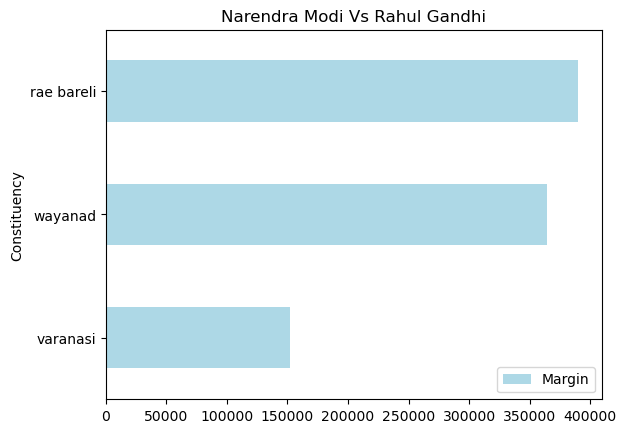

In [76]:
rahul_modi[['Constituency','Leading Candidate', 'Margin']].sort_values(by = 'Margin').plot(kind='barh', title = 'Narendra Modi Vs Rahul Gandhi', x='Constituency', y = 'Margin', color = 'lightblue')
plt.show()

In [84]:
party_wise_performance_margin_sum = df.groupby('Leading Party').sum()

In [89]:
party_wise_performance = df.groupby('Leading Party').count()

In [91]:
party_wise_performance = party_wise_performance['Status']

In [92]:
party_wise_performance = pd.DataFrame(party_wise_performance)

In [94]:
party_wise_performance['Total_votes'] = party_wise_performance_margin_sum['Margin']

In [96]:
party_wise_performance.sort_values(by= 'Status', ascending=False)

,Status,Total_votes
Leading Party,,
Bharatiya Janata Party,212,43772100
Indian National Congress,91,10711882
Samajwadi Party,34,2505679
All India Trinamool Congress,20,3519000
Dravida Munnetra Kazhagam,19,4350555
Telugu Desam,15,3472372
Shiv Sena (Uddhav Balasaheb Thackrey),9,1015430
Janata Dal (United),9,1061508
Shiv Sena,7,625879


In [98]:
Indian_votes = party_wise_performance['Total_votes'].sum()

In [100]:
party_wise_performance['Vote_percentage'] = party_wise_performance['Total_votes'].apply(lambda x: ((x/Indian_votes)*100))

In [102]:
party_wise_performance.sort_values(by='Vote_percentage', ascending=False)

,Status,Total_votes,Vote_percentage
Leading Party,,,
Bharatiya Janata Party,212,43772100,55.619205
Indian National Congress,91,10711882,13.611098
Dravida Munnetra Kazhagam,19,4350555,5.528051
All India Trinamool Congress,20,3519000,4.471432
Telugu Desam,15,3472372,4.412184
Samajwadi Party,34,2505679,3.183852
Janata Dal (United),9,1061508,1.348810
Shiv Sena (Uddhav Balasaheb Thackrey),9,1015430,1.290260
Indian Union Muslim League,4,938420,1.192407


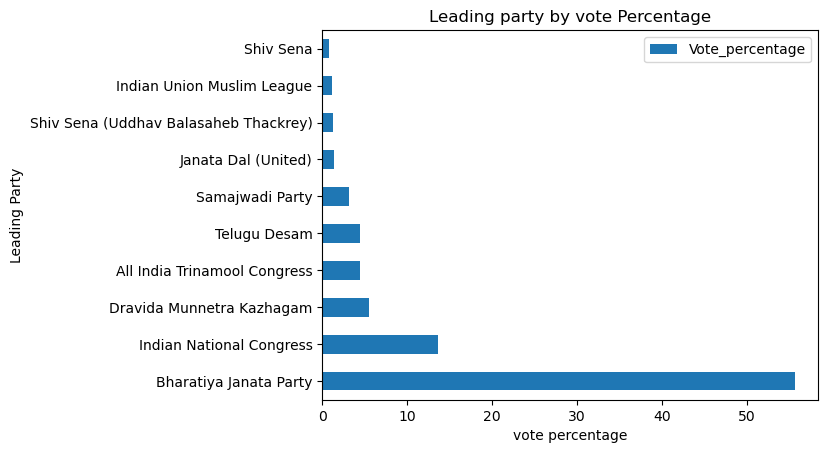

In [107]:
party_wise_performance.sort_values(by='Vote_percentage', ascending=False).head(10).plot(kind='barh', y = 'Vote_percentage', title = 'Leading party by vote Percentage', xlabel = 'vote percentage')
plt.show()

In [166]:
df_highest_margin = df[['Leading Candidate', 'Leading Party', 'Margin', 'state']].sort_values(by='Margin', ascending=False)

In [167]:
df_highest_margin = (df_highest_margin['Margin'] >= df['Margin'].median())
df_highest_margin = df[df_highest_margin]

/var/folders/db/jxndjlhs5mv34s2mswgkkf_00000gn/T/ipykernel_20052/4005332174.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_highest_margin = df[df_highest_margin]


In [168]:
df_highest_margin = df_highest_margin[['Constituency', 'Leading Party', 'Margin', 'state']]
df_highest_margin_grp = df_highest_margin.groupby('Leading Party')

In [169]:
df_highest_margin_grp['Leading Party'].count()

Leading Party
Aam Aadmi Party                                       1
Aazad Samaj Party (Kanshi Ram)                        1
All India Majlis-E-Ittehadul Muslimeen                1
All India Trinamool Congress                         12
Bharatiya Janata Party                              125
Communist Party of India                              2
Communist Party of India (Marxist)                    1
Dravida Munnetra Kazhagam                            14
Independent                                           2
Indian National Congress                             35
Indian Union Muslim League                            4
Jammu & Kashmir National Conference                   2
Janasena Party                                        2
Janata Dal (Secular)                                  1
Janata Dal (United)                                   4
Jharkhand Mukti Morcha                                2
Lok Janshakti Party(Ram Vilas)                        2
Marumalarchi Dravida Munnetra Kazh